In [ ]:
# we have images 28x28 pixels that we will transorm into matrices
# 0 -> completely black
#255 -> completely black

In [29]:
#let's import our libraries

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [36]:
data = pd.read_csv("train.csv")

In [37]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
data_dev  = data[0:1000].T #now every string is 785 columns , before that every pixel was a column
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [38]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #our first matrice layer_0 -> layer_1
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5 #our second matrice layer_1 -> layer_2
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z): # it goes trough Z and return Z if it's greater than zero
    return np.maximum(Z, 0)

def softmax(Z):  # if you want to understand these lines check https://ru.wikipedia.org/wiki/Softmax
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 # these are values that will go into layer_1
    A1 = ReLU(Z1) # it is layer_1
    Z2 = W2.dot(A1) + b2  # these are values that will go into output
    A2 = softmax(Z2) #it is output
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [39]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [42]:
W1 , b1 , W2 , b2 = gradient_descent(X_train ,  Y_train , 0.1 , 600)

Iteration:  0
[4 5 5 ... 5 5 5] [1 3 4 ... 1 5 7]
0.106
Iteration:  10
[4 3 5 ... 4 4 7] [1 3 4 ... 1 5 7]
0.13817073170731708
Iteration:  20
[4 3 5 ... 4 4 7] [1 3 4 ... 1 5 7]
0.2116341463414634
Iteration:  30
[1 3 5 ... 4 4 7] [1 3 4 ... 1 5 7]
0.29734146341463413
Iteration:  40
[1 3 5 ... 1 4 7] [1 3 4 ... 1 5 7]
0.369390243902439
Iteration:  50
[1 3 5 ... 1 4 7] [1 3 4 ... 1 5 7]
0.4555365853658537
Iteration:  60
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.5178048780487805
Iteration:  70
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.5591707317073171
Iteration:  80
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.592609756097561
Iteration:  90
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.6207073170731707
Iteration:  100
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.6462926829268293
Iteration:  110
[1 3 5 ... 1 6 7] [1 3 4 ... 1 5 7]
0.6678780487804878
Iteration:  120
[1 3 9 ... 1 6 7] [1 3 4 ... 1 5 7]
0.6871707317073171
Iteration:  130
[1 3 9 ... 1 6 7] [1 3 4 ... 1 5 7]
0.7041463414634146
Iteration:  140
[1 3 9 ... 1 6

In [ ]:
# 85% Accuracy! Great! 

In [43]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X) # the first 3 _ are like trash cans , we onle need prediction
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
#Let's see on some predictions

Prediction:  [2]
Label:  2


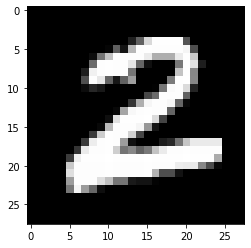

In [44]:
test_prediction(11 , W1 , b1 , W2 , b2)

Prediction:  [8]
Label:  8


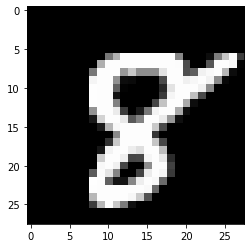

In [45]:
test_prediction(26 , W1 , b1 , W2 , b2)

Prediction:  [2]
Label:  2


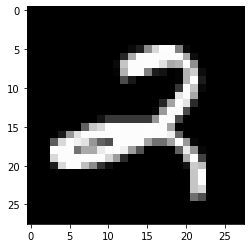

In [46]:
test_prediction(14 , W1 , b1 , W2 , b2)

Prediction:  [3]
Label:  3


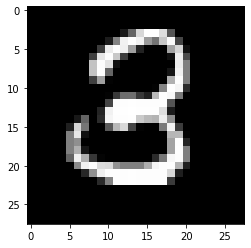

In [47]:
test_prediction(145 , W1 , b1 , W2 , b2)

Prediction:  [4]
Label:  4


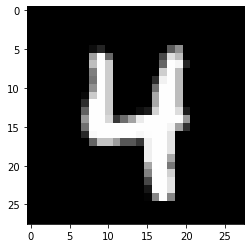

In [48]:
test_prediction(12 , W1 , b1 , W2 , b2)

In [ ]:
#Hah ! Awesome , espessialy if you remember that we done it from scratch!
#So...The time has come.. Let's check how our network will behave on test data set

In [49]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 6 3 6 3 1 3 0 2 1 5 9 8 4 6 6 1 6 1 3 0 4 4 4 2 5 9 1 0 7 0 0 2 5 2 7 2
 5 9 6 3 3 9 5 4 0 2 0 7 7 2 9 1 9 7 4 3 1 2 5 3 6 2 3 6 6 9 3 4 7 8 0 6 6
 5 6 8 4 0 2 5 9 4 9 3 3 2 6 6 3 0 1 5 3 6 4 6 8 3 2 3 4 4 3 8 7 4 9 7 4 3
 1 5 3 5 8 4 8 3 9 4 7 7 5 8 0 0 1 5 0 7 9 1 9 6 6 2 6 4 3 2 7 2 4 0 8 8 6
 3 1 6 3 3 9 9 9 7 4 3 6 8 7 6 0 1 7 1 7 7 6 0 9 9 8 5 0 8 0 8 1 0 3 9 1 8
 6 6 0 7 5 9 4 1 7 9 3 9 1 2 0 3 2 9 7 0 6 8 6 4 7 6 8 5 2 5 1 8 7 8 2 2 8
 6 3 8 6 6 8 8 4 1 8 6 4 2 2 6 9 1 1 5 1 0 7 1 1 9 1 3 7 0 0 7 4 7 9 9 0 4
 7 0 5 6 1 8 0 1 1 0 1 5 5 3 5 3 1 7 6 2 9 6 3 4 0 2 4 1 2 9 6 7 2 3 9 8 2
 8 1 2 4 4 9 1 8 7 2 6 7 7 7 1 7 3 0 6 0 2 7 5 6 1 9 6 7 6 2 0 9 9 7 1 3 6
 7 4 7 0 6 8 1 4 7 8 8 2 1 7 8 6 6 2 7 8 5 5 1 5 3 0 6 0 1 4 9 1 2 2 9 2 2
 3 7 4 7 3 7 4 3 6 8 1 8 6 5 8 5 5 6 4 2 0 6 6 4 1 7 2 9 8 9 4 9 9 3 1 0 7
 7 1 3 4 9 6 4 0 4 4 0 2 4 2 0 3 7 8 6 0 6 5 4 8 5 7 5 2 1 6 1 0 0 8 5 2 1
 1 4 3 2 8 5 2 0 6 8 4 4 8 1 4 3 5 9 8 8 5 4 4 7 9 4 5 9 5 3 3 0 2 7 1 8 7
 3 3 2 9 9 0 4 3 0 7 0 2 

0.854

In [ ]:
#This is pretty good result cause we have not used any of regularization methods. 